In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd
import cv2
from glob import glob
from tqdm import tqdm
import os
import subprocess

In [ ]:
ipd.Video('/content/0000_fake.mp4')


In [ ]:
# Load in video capture
cap = cv2.VideoCapture('/content/0000_fake.mp4')

In [ ]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

292.0

In [ ]:
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 316.0, Width 288.0


In [ ]:
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 30.00


In [ ]:
cap.release()

In [ ]:
cap = cv2.VideoCapture('/content/0000_fake.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (316, 288, 3)


array([[[ 97, 104,  97],
        [ 89,  96,  89],
        [ 85,  92,  85],
        ...,
        [ 77,  89,  81],
        [ 74,  86,  78],
        [ 72,  84,  76]],

       [[ 97, 104,  97],
        [ 89,  96,  89],
        [ 85,  92,  85],
        ...,
        [ 77,  89,  81],
        [ 74,  86,  78],
        [ 72,  84,  76]],

       [[ 96, 103,  96],
        [ 88,  95,  88],
        [ 85,  92,  85],
        ...,
        [ 77,  89,  81],
        [ 74,  86,  78],
        [ 72,  84,  76]],

       ...,

       [[ 11,   8,   7],
        [ 11,   8,   7],
        [ 11,   8,   7],
        ...,
        [  7,   4,   3],
        [  7,   4,   3],
        [  7,   4,   3]],

       [[ 11,   8,   7],
        [ 11,   8,   7],
        [ 11,   8,   7],
        ...,
        [  7,   4,   3],
        [  7,   4,   3],
        [  7,   4,   3]],

       [[ 11,   8,   7],
        [ 11,   8,   7],
        [ 11,   8,   7],
        ...,
        [  7,   4,   3],
        [  7,   4,   3],
        [  7,   4,   3]]], dtype=uint8)
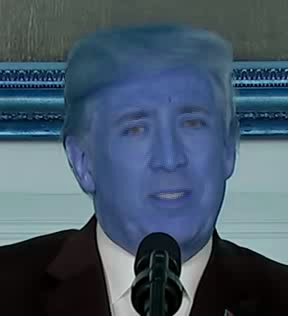

In [ ]:
img

In [ ]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

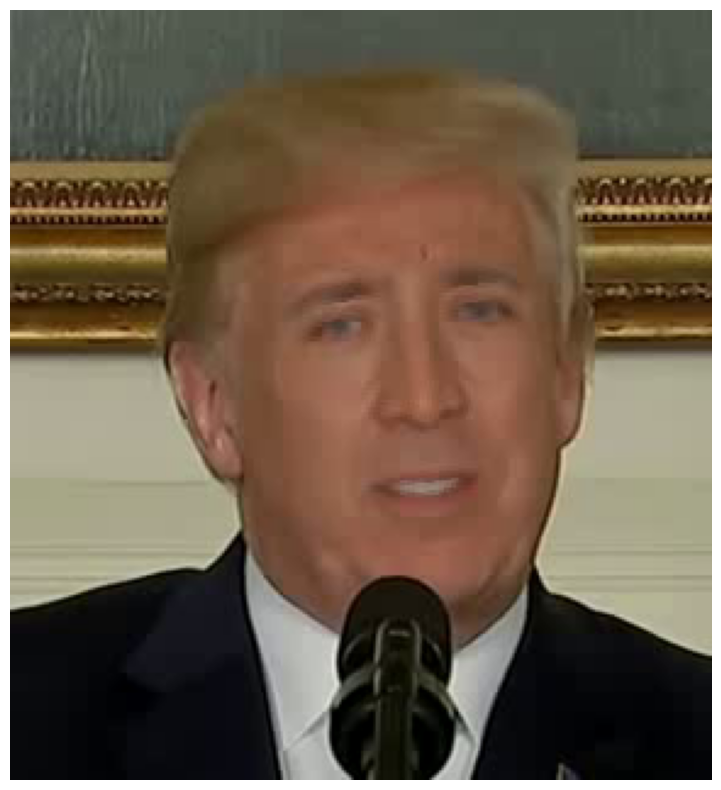

In [ ]:
display_cv2_img(img)

In [ ]:
cap.release()

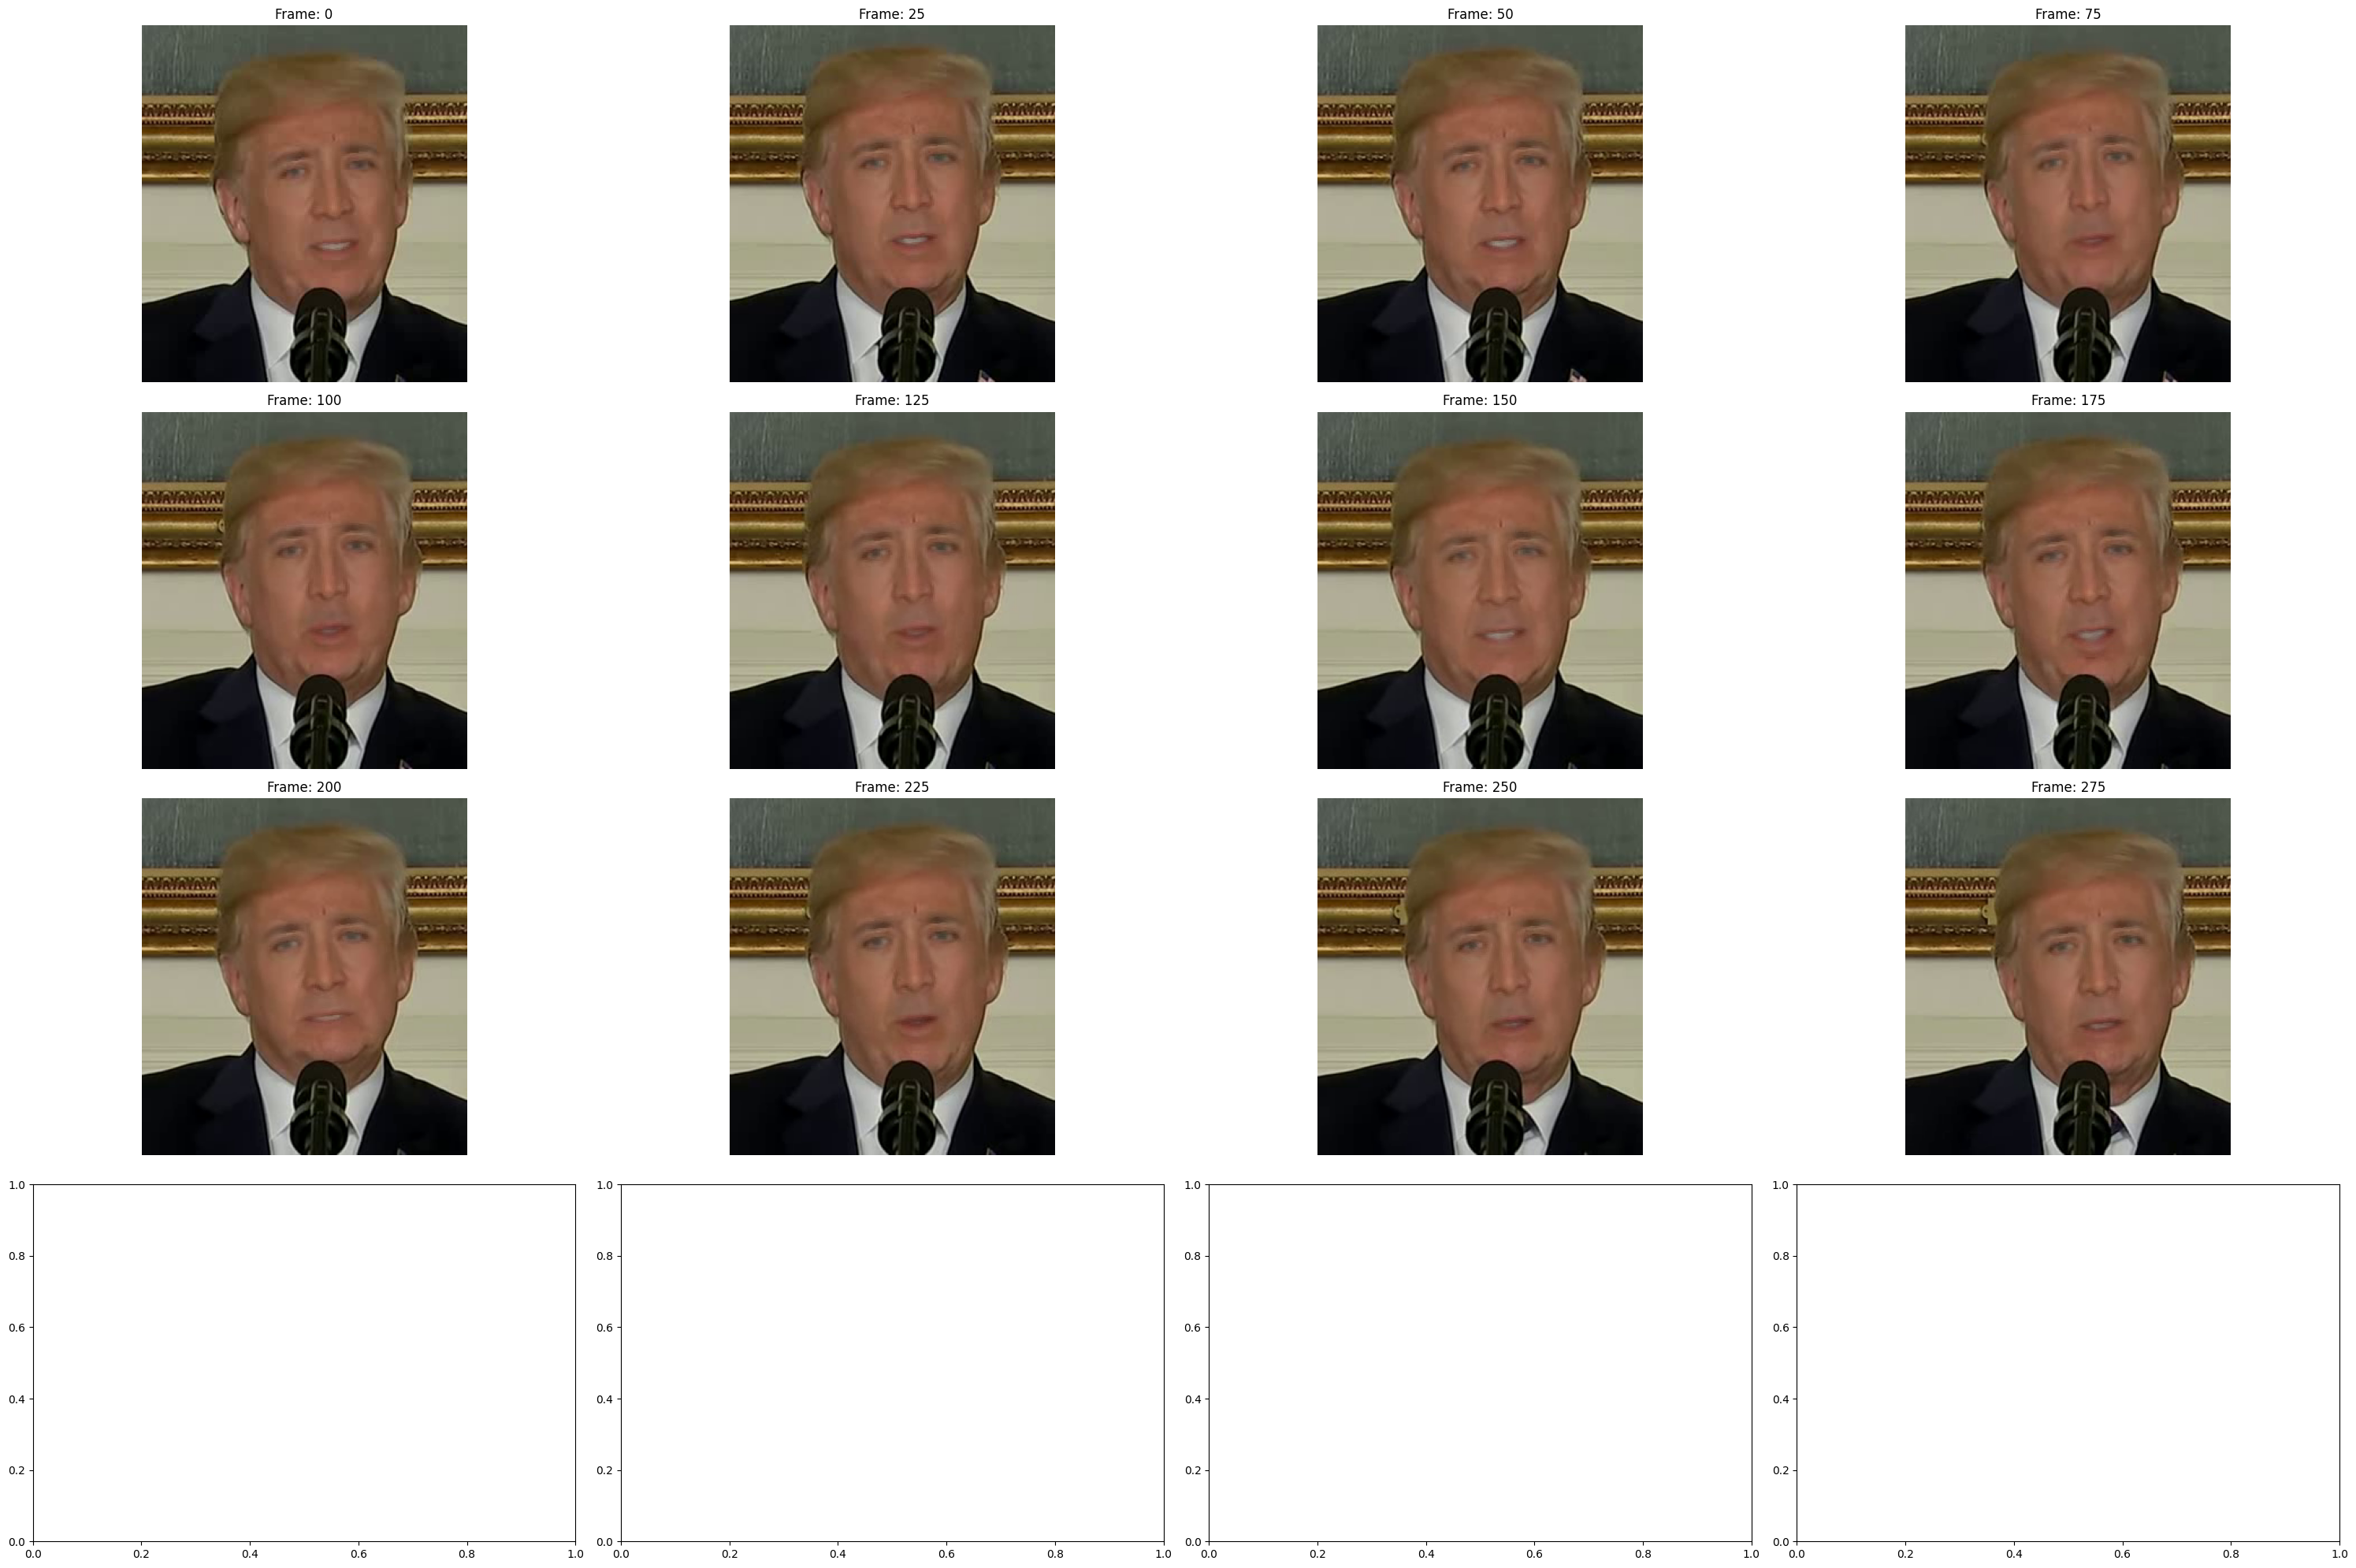

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("/content/0000_fake.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 25 == 0:#every 100th frame
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

In [33]:
import cv2
import os
import random

# Function to create a directory if it doesn't exist
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Function to extract and save frames from a video
def save_random_frames_from_video(video_path, output_folder, num_frames=30):
    # Create a folder with the same name as the video file (without extension)
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    frames_folder = os.path.join(output_folder, video_name)
    create_directory(frames_folder)

    # Capture the video
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = random.sample(range(total_frames), min(num_frames, total_frames))

    frame_count = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret or saved_count >= num_frames:
            break

        if frame_count in frame_indices:

            # Preprocess frame (resize and normalize if needed)
            # Example: Resize to 224x224 and normalize pixel values to [0, 1]
            frame = cv2.resize(frame, (224, 224))
            frame = frame / 255.0

            # Save the frame as an image file
            frame_filename = os.path.join(frames_folder, f"frame_{frame_count:04d}.png")
            cv2.imwrite(frame_filename, frame * 255)  # Multiply by 255 to convert back to [0, 255] range for saving
            saved_count += 1
        frame_count += 1

    cap.release()
    print(f"Frames from video '{video_name}' have been saved to '{frames_folder}'")

# Example usage
video_folder = '/content/fake'
output_folder = '/content/fake_img'

# Ensure output folder exists
create_directory(output_folder)

# Process each video in the video folder
for video_file in os.listdir(video_folder):
    if video_file.endswith(('.mp4', '.avi', '.mov', '.mkv')):  # Add other extensions as needed
        video_path = os.path.join(video_folder, video_file)
        save_random_frames_from_video(video_path, output_folder)


Frames from video '0000_fake' have been saved to '/content/fake_img/0000_fake'


In [34]:
import os
import glob

def delete_images_in_folder(folder_path):
    image_extensions = ('*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp')  # Add more if needed
    for ext in image_extensions:
        for file_path in glob.glob(os.path.join(folder_path, ext)):
            os.remove(file_path)
            print(f"Deleted: {file_path}")

# Example usage:
folder_to_clean = "/content/fake_img/"
delete_images_in_folder(folder_to_clean)

In [35]:
# Function to detect faces and crop them from the saved frames
def detect_and_crop_faces(frames_folder):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for frame_file in os.listdir(frames_folder):
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)

        if frame is None:
            continue

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            cropped_face = frame[y:y+h, x:x+w]
            cropped_face = cv2.resize(cropped_face, (224, 224))  # Resize cropped face to desired size
            cv2.imwrite(frame_path, cropped_face)  # Save cropped face replacing the original frame

        if len(faces) == 0:
            print(f"No faces detected in {frame_file}")
        else:
            print(f"Faces detected and cropped in {frame_file}")

In [36]:
for video_file in os.listdir(video_folder):
  frames_folder = os.path.join(output_folder, os.path.splitext(video_file)[0])
  detect_and_crop_faces(frames_folder)

Faces detected and cropped in frame_4525.png
Faces detected and cropped in frame_6250.png
Faces detected and cropped in frame_0181.png
Faces detected and cropped in frame_2025.png
Faces detected and cropped in frame_0126.png
Faces detected and cropped in frame_4125.png
Faces detected and cropped in frame_0115.png
Faces detected and cropped in frame_0167.png
Faces detected and cropped in frame_0084.png
Faces detected and cropped in frame_0275.png
Faces detected and cropped in frame_0206.png
Faces detected and cropped in frame_3650.png
Faces detected and cropped in frame_0196.png
Faces detected and cropped in frame_0085.png
Faces detected and cropped in frame_0250.png
Faces detected and cropped in frame_0156.png
Faces detected and cropped in frame_0186.png
Faces detected and cropped in frame_1275.png
Faces detected and cropped in frame_5450.png
Faces detected and cropped in frame_0050.png
Faces detected and cropped in frame_4700.png
Faces detected and cropped in frame_1650.png
Faces dete

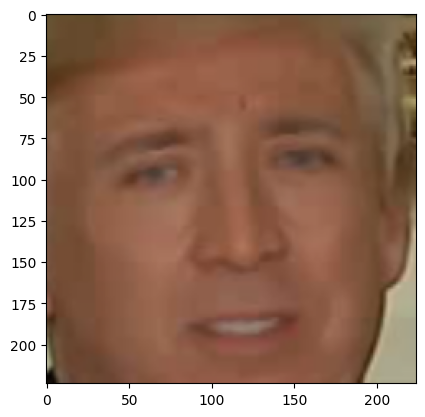

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image using mpimg.imread()
img = mpimg.imread('/content/fake_img/0000_fake/frame_0000.png')

# Display the image
plt.imshow(img)
plt.show()

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Attention layer
class AttentionLayer(layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[-1],), initializer='zeros', trainable=True)
        self.U = self.add_weight(name='U_weight', shape=(input_shape[-1], 1), initializer='random_normal', trainable=True)

    def call(self, inputs):
        u = tf.tanh(tf.tensordot(inputs, self.W, axes=[2, 0]) + self.b)
        a = tf.nn.softmax(tf.tensordot(u, self.U, axes=[2, 0]), axis=1)
        output = tf.reduce_sum(inputs * a, axis=1)
        return output

# Define the model
def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))
    model.add(layers.TimeDistributed(layers.Flatten()))
    model.add(layers.LSTM(128, return_sequences=True))
    model.add(AttentionLayer())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example input shape (batch_size, time_steps, height, width, channels)
input_shape = (None, 30, 224, 224, 3)  # Adjust this shape based on your data
model = create_model(input_shape)
model.summary()


ValueError: Exception encountered when calling layer "time_distributed_1" (type TimeDistributed).

Input 0 of layer "max_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 30, 222, 222, 32)

Call arguments received by layer "time_distributed_1" (type TimeDistributed):
  • inputs=tf.Tensor(shape=(None, None, 30, 222, 222, 32), dtype=float32)
  • training=None
  • mask=None